In [145]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [146]:
#load data
df = pd.read_csv('customer_analysis.csv')
#fix the data separated by tab
df = pd.read_csv('customer_analysis.csv', sep='\t')
#show the data
print(df)

         ID  Year_Birth   Education Marital_Status   Income  Kidhome  \
0      5524        1957  Graduation         Single  58138.0        0   
1      2174        1954  Graduation         Single  46344.0        1   
2      4141        1965  Graduation       Together  71613.0        0   
3      6182        1984  Graduation       Together  26646.0        1   
4      5324        1981         PhD        Married  58293.0        1   
...     ...         ...         ...            ...      ...      ...   
2235  10870        1967  Graduation        Married  61223.0        0   
2236   4001        1946         PhD       Together  64014.0        2   
2237   7270        1981  Graduation       Divorced  56981.0        0   
2238   8235        1956      Master       Together  69245.0        0   
2239   9405        1954         PhD        Married  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  04-09-2012       58       635  ...            

In [147]:
#check for null
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [148]:
#drop customer with id 9432
df = df[df['ID'] != 9432]

#di drop karena nyempil sendiri mengganggu chart

In [149]:
#replace null value from income into mean
df['Income'] = df['Income'].fillna(df['Income'].mean())
#check for null
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [150]:
#date time format Dt_Customer
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])
df['Dt_Customer'] = df['Dt_Customer'].dt.strftime('%d-%m-%Y')
df['Dt_Customer'].head()

C:\Users\ASUS\AppData\Local\Temp\ipykernel_14264\3368489127.py:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])


0    09-04-2012
1    03-08-2014
2    21-08-2013
3    02-10-2014
4    19-01-2014
Name: Dt_Customer, dtype: object

In [151]:
#encode categorical data into numerical format
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Education'] = le.fit_transform(df['Education'])
df['Marital_Status'] = le.fit_transform(df['Marital_Status'])
#show the data
print(df)

         ID  Year_Birth  Education  Marital_Status   Income  Kidhome  \
0      5524        1957          2               4  58138.0        0   
1      2174        1954          2               4  46344.0        1   
2      4141        1965          2               5  71613.0        0   
3      6182        1984          2               5  26646.0        1   
4      5324        1981          4               3  58293.0        1   
...     ...         ...        ...             ...      ...      ...   
2235  10870        1967          2               3  61223.0        0   
2236   4001        1946          4               5  64014.0        2   
2237   7270        1981          2               2  56981.0        0   
2238   8235        1956          3               5  69245.0        0   
2239   9405        1954          4               3  52869.0        1   

      Teenhome Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  \
0            0  09-04-2012       58       635  ...            

feature engineering

In [152]:
#age extraction
#decipher customer age from the year of birth
current_year = dt.datetime.now().year
current_year = int(current_year)
df['Age'] = current_year - df['Year_Birth']
#check the data for age and customer id
df[['ID','Year_Birth', 'Age']].head()

,ID,Year_Birth,Age
0,5524,1957,66
1,2174,1954,69
2,4141,1965,58
3,6182,1984,39
4,5324,1981,42


In [153]:
# List of spending columns
spending_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']

# Create a new column 'Spent' by summing up spending in these columns
df['Spent'] = df[spending_columns].sum(axis=1)
df[['ID', 'Spent']].head()

,ID,Spent
0,5524,1617
1,2174,27
2,4141,776
3,6182,53
4,5324,422


In [154]:
#define function for Living_with based on Marital_Status.
def Living_with(status):
    if status in [0,1,2,4,6]:
        return 'Alone'
    elif status in [3,5]:
        return 'Couple'
    else:
        return 'Other'

#apply the function
df['Living_with'] = df['Marital_Status'].apply(Living_with)
#show the data
df[['ID', 'Marital_Status', 'Living_with']].head()

,ID,Marital_Status,Living_with
0,5524,4,Alone
1,2174,4,Alone
2,4141,5,Couple
3,6182,5,Couple
4,5324,3,Couple


In [155]:
# Define a function to calculate family size based on number of children and marital status
def calculate_family_size(row):
    if row['Marital_Status'] in [3,5]:
        return row['Kidhome'] + row['Teenhome'] + 2
    elif row['Marital_Status'] in [0,1,2,4,6]:
        return row['Kidhome'] + row['Teenhome'] + 1

# Apply the function to create a new column 'Family_Size'
df['Family_Size'] = df.apply(calculate_family_size, axis=1)

# Show the data
df[['ID', 'Marital_Status', 'Kidhome', 'Teenhome', 'Family_Size']].head()


,ID,Marital_Status,Kidhome,Teenhome,Family_Size
0,5524,4,0,0,1.0
1,2174,4,1,1,3.0
2,4141,5,0,0,2.0
3,6182,5,1,0,3.0
4,5324,3,1,0,3.0


In [156]:
# Define a function to create a new column 'Is_Parent' based on the number of children
def is_parent(row):
    if row['Kidhome'] + row['Teenhome'] > 0:
        return 'Yes'
    else:
        return 'No'

# Apply the function to create a new column 'Is_Parent'
df['Is_Parent'] = df.apply(is_parent, axis=1)

# Show the data
df[['ID', 'Kidhome', 'Teenhome', 'Is_Parent']].head()

,ID,Kidhome,Teenhome,Is_Parent
0,5524,0,0,No
1,2174,1,1,Yes
2,4141,0,0,No
3,6182,1,0,Yes
4,5324,1,0,Yes


In [157]:
# Define a function to categorize education level
def categorize_education_level(level):
    if level in [0, 1]:
        return '0'
    elif level in [2]:
        return '1'
    elif level in [3]:
        return '2'
    else:
        return '3'

# Apply the function to create a new column 'Education_Level'
df['Education_Level'] = df['Education'].apply(categorize_education_level)

# Show the data
print(df[['ID', 'Education', 'Education_Level']])

         ID  Education Education_Level
0      5524          2               1
1      2174          2               1
2      4141          2               1
3      6182          2               1
4      5324          4               3
...     ...        ...             ...
2235  10870          2               1
2236   4001          4               3
2237   7270          2               1
2238   8235          3               2
2239   9405          4               3

[2239 rows x 3 columns]


In [158]:
df = df.drop(['Year_Birth', 'Education', 'Marital_Status', 'Dt_Customer', 'Z_CostContact', 'Z_Revenue'], axis=1)
df.head()

,ID,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Living_with,Family_Size,Is_Parent,Education_Level
0,5524,58138.0,0,0,58,635,88,546,172,88,...,0,0,0,1,66,1617,Alone,1.0,No,1
1,2174,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,0,69,27,Alone,3.0,Yes,1
2,4141,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,0,58,776,Couple,2.0,No,1
3,6182,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,0,39,53,Couple,3.0,Yes,1
4,5324,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,0,42,422,Couple,3.0,Yes,3


Data Preparation


In [159]:
# apply label encoding to Living_with
df['Living_with'] = le.fit_transform(df['Living_with'])

# apply label encoding to Is_Parent
df['Is_Parent'] = le.fit_transform(df['Is_Parent'])
df.head()

,ID,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Living_with,Family_Size,Is_Parent,Education_Level
0,5524,58138.0,0,0,58,635,88,546,172,88,...,0,0,0,1,66,1617,0,1.0,0,1
1,2174,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,0,69,27,0,3.0,1,1
2,4141,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,0,58,776,1,2.0,0,1
3,6182,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,0,39,53,1,3.0,1,1
4,5324,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,0,42,422,1,3.0,1,3


In [160]:
from sklearn.preprocessing import StandardScaler

# Create an instance of the StandardScaler class
scaler = StandardScaler()

# Scale the features
df_scaled = scaler.fit_transform(df)

# Convert the scaled features back to a dataframe
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

# Show the scaled data
print(df_scaled.head())


         ID    Income   Kidhome  Teenhome   Recency  MntWines  MntFruits  \
0 -0.020472  0.288153 -0.824769 -0.930282  0.306624  0.983339   1.551126   
1 -1.052624 -0.262819  1.033035  0.906491 -0.384051 -0.870826  -0.636311   
2 -0.446581  0.917655 -0.824769 -0.930282 -0.798456  0.362313   0.570551   
3  0.182261 -1.183037  1.033035 -0.930282 -0.798456 -0.870826  -0.560882   
4 -0.082093  0.295394  1.033035 -0.930282  1.549838 -0.389456   0.419693   

   MntMeatProducts  MntFishProducts  MntSweetProducts  ...  AcceptedCmp1  \
0         1.679196         2.461517          1.476020  ...     -0.262174   
1        -0.713430        -0.650588         -0.631700  ...     -0.262174   
2        -0.177305         1.344820         -0.147167  ...     -0.262174   
3        -0.651399        -0.504136         -0.583247  ...     -0.262174   
4        -0.217182         0.154898         -0.001807  ...     -0.262174   

   AcceptedCmp2  Complain  Response       Age     Spent  Living_with  \
0     -0.11653

Clustering

In [161]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [162]:
#check the data for null or Nan
df_scaled.isnull().sum()
#drop the null or Nan from Family_Size
df_scaled = df_scaled.dropna(subset=['Family_Size'])

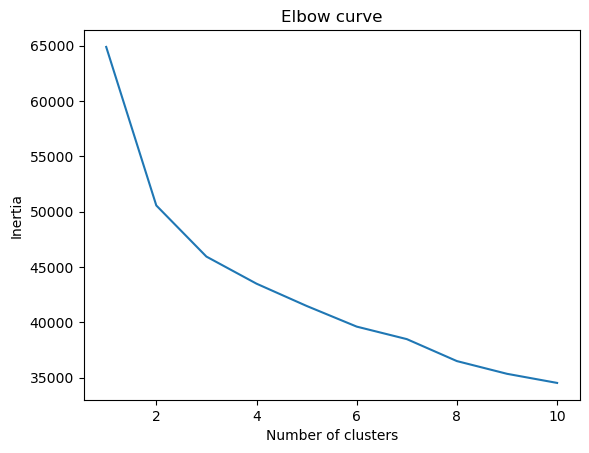

In [163]:
from sklearn.cluster import KMeans
# Create an empty list to store the inertia values
inertia = []

# Define the range of clusters to test
k_range = range(1, 11)

# Loop through each value of k
for k in k_range:
    # Create a KMeans instance with k clusters
    model = KMeans(n_clusters=k, n_init=10, random_state=42)
    
    # Fit the model to the data
    model.fit(df_scaled)
    
    # Append the inertia value to the list
    inertia.append(model.inertia_)

# Plot the elbow curve
plt.plot(k_range, inertia)
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow curve')
plt.show()


In [164]:
from sklearn.cluster import AgglomerativeClustering

#perform agglomerative clustering with optimal number of clusters
model = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')
clusters = model.fit_predict(df_scaled)


c:\Users\ASUS\anaconda3\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


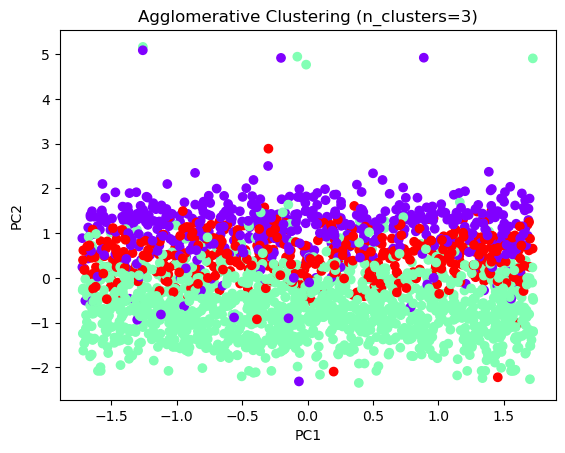

In [165]:
# Create a scatter plot of the first two principal components
plt.scatter(df_scaled.iloc[:, 0], df_scaled.iloc[:, 1], c=clusters, cmap='rainbow')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Agglomerative Clustering (n_clusters=3)')
plt.show()



Visualization

In [166]:
df.head()

,ID,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,AcceptedCmp1,AcceptedCmp2,Complain,Response,Age,Spent,Living_with,Family_Size,Is_Parent,Education_Level
0,5524,58138.0,0,0,58,635,88,546,172,88,...,0,0,0,1,66,1617,0,1.0,0,1
1,2174,46344.0,1,1,38,11,1,6,2,1,...,0,0,0,0,69,27,0,3.0,1,1
2,4141,71613.0,0,0,26,426,49,127,111,21,...,0,0,0,0,58,776,1,2.0,0,1
3,6182,26646.0,1,0,26,11,4,20,10,3,...,0,0,0,0,39,53,1,3.0,1,1
4,5324,58293.0,1,0,94,173,43,118,46,27,...,0,0,0,0,42,422,1,3.0,1,3


C:\Users\ASUS\AppData\Local\Temp\ipykernel_14264\1507642658.py:14: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  campaigns_by_education = df.groupby('Education_Level')['AcceptedCmp1', 'AcceptedCmp2'].sum()


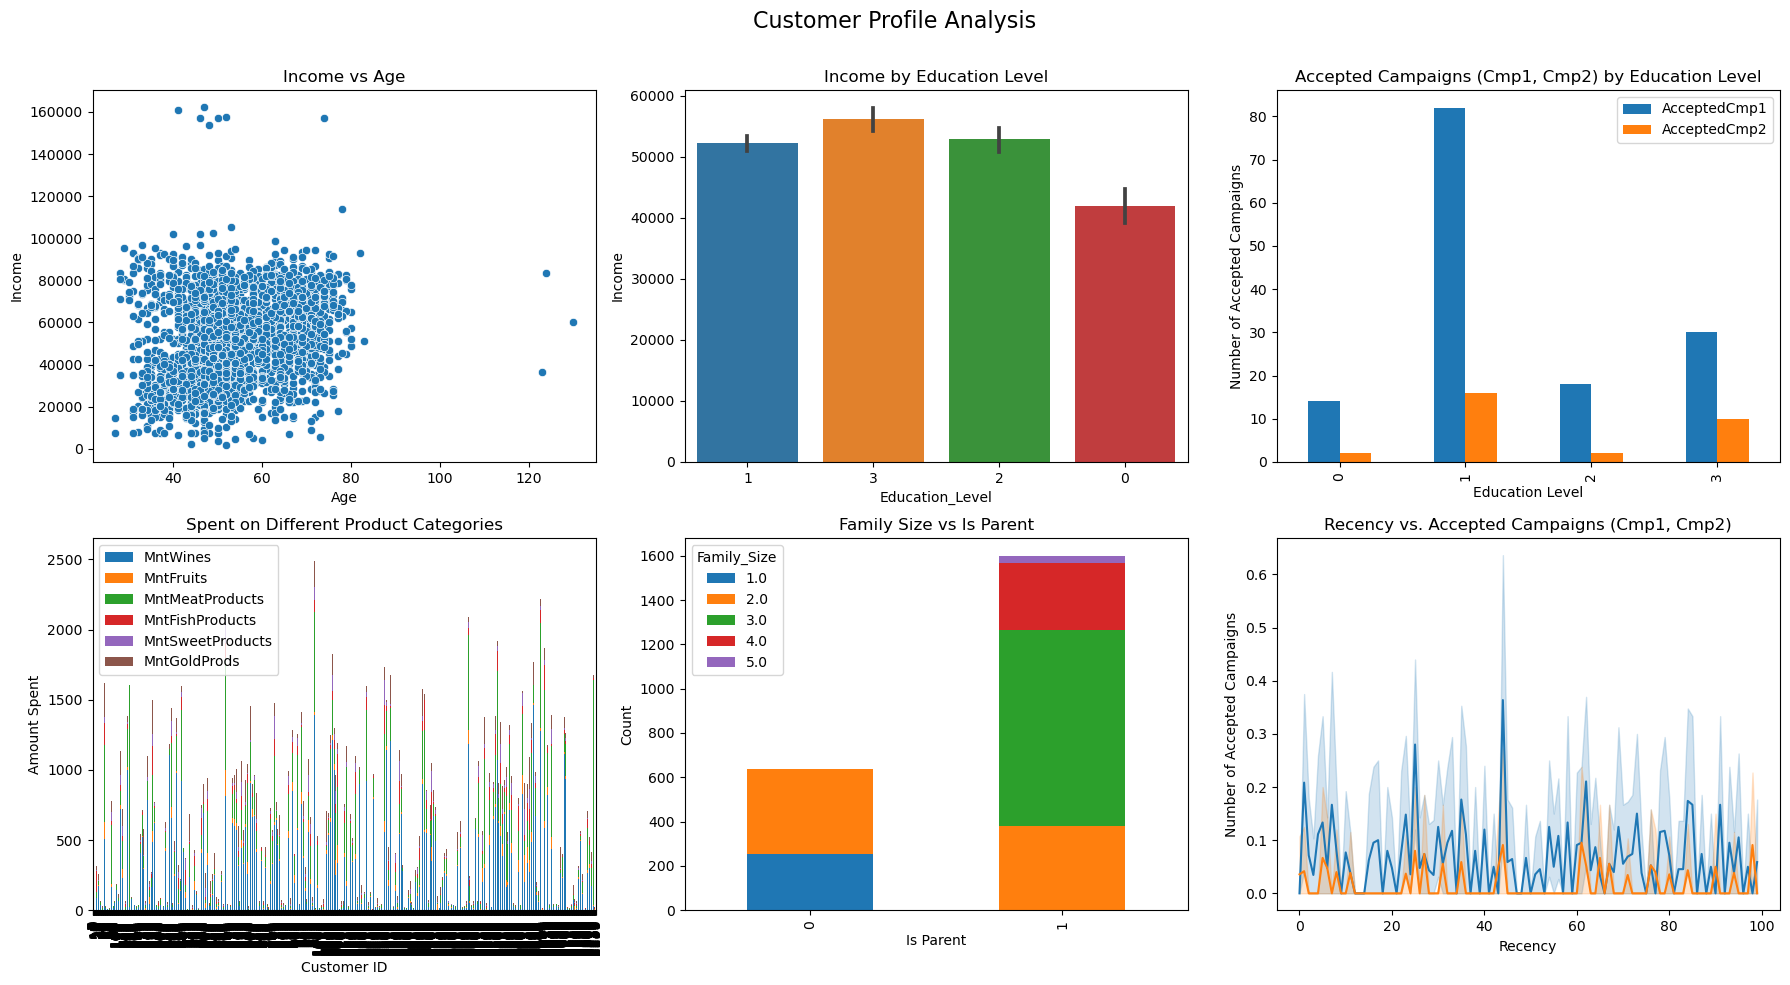

In [167]:
# Create a figure with subplots
fig, axes = plt.subplots(2, 3, figsize=(18, 10))
fig.suptitle('Customer Profile Analysis', fontsize=16)

# Plot 1: Scatter plot of Income vs Age
sns.scatterplot(x='Age', y='Income', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Income vs Age')

# Plot 2: Bar chart of Income by Education Level
sns.barplot(x='Education_Level', y='Income', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Income by Education Level')

# Plot 3: Grouped bar chart of Accepted Campaigns (Cmp1, Cmp2) by Education Level
campaigns_by_education = df.groupby('Education_Level')['AcceptedCmp1', 'AcceptedCmp2'].sum()
campaigns_by_education.plot(kind='bar', ax=axes[0, 2])
axes[0, 2].set_xlabel('Education Level')
axes[0, 2].set_ylabel('Number of Accepted Campaigns')
axes[0, 2].set_title('Accepted Campaigns (Cmp1, Cmp2) by Education Level')

# Plot 4: Stacked bar chart of Spent on Different Product Categories
spending_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
df[spending_columns].plot(kind='bar', stacked=True, ax=axes[1, 0])
axes[1, 0].set_xlabel('Customer ID')
axes[1, 0].set_ylabel('Amount Spent')
axes[1, 0].set_title('Spent on Different Product Categories')

# Plot 5: Stacked bar chart of Is Parent vs. Family Size
grouped_data = df.groupby(['Is_Parent', 'Family_Size']).size().unstack()
grouped_data.plot(kind='bar', stacked=True, ax=axes[1, 1])
axes[1, 1].set_xlabel('Is Parent')
axes[1, 1].set_ylabel('Count')
axes[1, 1].set_title('Family Size vs Is Parent')

# Plot 6: Line chart of Recency vs. Accepted Campaigns (Cmp1, Cmp2)
sns.lineplot(x='Recency', y='AcceptedCmp1', data=df, ax=axes[1, 2])
sns.lineplot(x='Recency', y='AcceptedCmp2', data=df, ax=axes[1, 2])
axes[1, 2].set_xlabel('Recency')
axes[1, 2].set_ylabel('Number of Accepted Campaigns')
axes[1, 2].set_title('Recency vs. Accepted Campaigns (Cmp1, Cmp2)')

plt.tight_layout()
plt.subplots_adjust(top=0.9)
plt.show()

In [168]:
# Step 1: Check the lengths
print(len(df))
print(len(clusters))

# Step 2: If lengths are not the same, drop extra rows or add missing values
if len(df) > len(clusters):
    df = df.iloc[:len(clusters)]
elif len(df) < len(clusters):
    clusters = clusters[:len(df)]

2239
2237


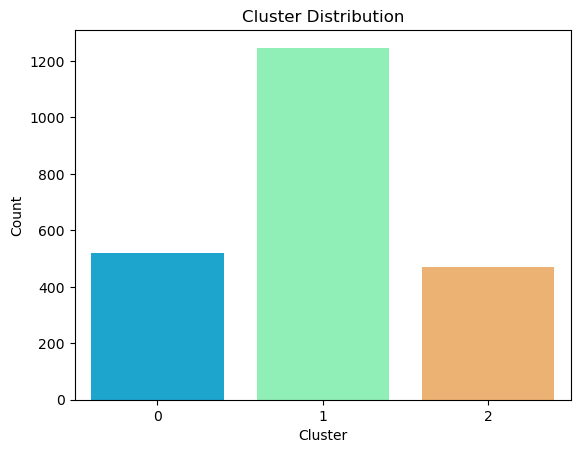

In [171]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a countplot of the cluster distribution
sns.countplot(x=clusters, palette='rainbow')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.title('Cluster Distribution')
plt.show()


2237
2237


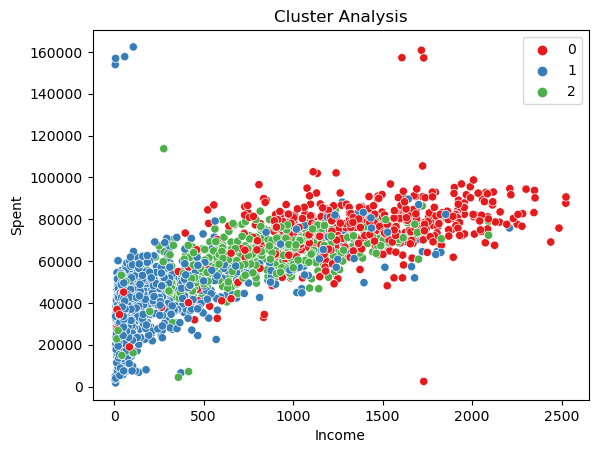

In [ ]:
import seaborn as sns

# do a profile analysis of the cluster income and spending
sns.scatterplot(x='Spent', y='Income', data=df, hue=clusters, palette='Set1')
plt.xlabel('Income')
plt.ylabel('Spent')
plt.title('Cluster Analysis')
plt.show()
